In [ ]:
!pip install pyheif
!pip install mtcnn
!pip install keras-facenet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=4f4a96e64f0366a874a50d9908decfbadd0c2c78adb20c8dc311fecb5621e428
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import pyheif
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image
from keras.preprocessing import image
from keras_facenet import FaceNet
from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Train_dataset='/content/drive/MyDrive/data/train'
test_dataset='/content/drive/MyDrive/data/test/photos'
text_file = '/content/drive/MyDrive/data/test/labels.txt'

In [ ]:
original_main_folder = Train_dataset
new_main_folder = '/content/Changedformat'
os.makedirs(new_main_folder, exist_ok=True)
for subfolder in os.listdir(original_main_folder):
    original_subfolder_path = os.path.join(original_main_folder, subfolder)

    if os.path.isdir(original_subfolder_path):
        new_subfolder_path = os.path.join(new_main_folder, subfolder)
        os.makedirs(new_subfolder_path, exist_ok=True)
        for filename in os.listdir(original_subfolder_path):
            original_file_path = os.path.join(original_subfolder_path, filename)

            if os.path.isfile(original_file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.heic')):
                try:
                    if filename.lower().endswith('.heic'):
                        heif_file = pyheif.read(original_file_path)
                        img = Image.frombytes(
                            heif_file.mode,
                            heif_file.size,
                            heif_file.data,
                            "raw",
                            heif_file.mode,
                            heif_file.stride,
                        )
                    else:
                        img = Image.open(original_file_path)
                    new_filename = os.path.splitext(filename)[0] + '.jpg'
                    new_file_path = os.path.join(new_subfolder_path, new_filename)
                    img.convert('RGB').save(new_file_path, 'JPEG', quality=90)
                    print(f"Converted: {filename} to {new_filename}")
                except Exception as e:
                    print(f"Error converting {filename}: {e}")
            else:
                print(f"Skipped: {filename} (not an image)")

Converted: Haisong Wang.jpeg to Haisong Wang.jpg
Converted: Haisong Wang.png to Haisong Wang.jpg
Converted: IMG_8243 (1).jpeg to IMG_8243 (1).jpg
Converted: IMG_8271 (1).jpeg to IMG_8271 (1).jpg
Converted: IMG_8373 (1).jpeg to IMG_8373 (1).jpg
Converted: IMG_8403.jpeg to IMG_8403.jpg
Converted: IMG_8538.HEIC to IMG_8538.jpg
Converted: 9.png to 9.jpg
Converted: IMG_8480.jpeg to IMG_8480.jpg
Converted: 1696298036.481302.jpg to 1696298036.481302.jpg
Converted: 1696298049.68504.jpg to 1696298049.68504.jpg
Converted: 1696298062.831307.jpg to 1696298062.831307.jpg
Converted: 1696544946.764776.jpg to 1696544946.764776.jpg
Converted: 1696544875.703294.jpg to 1696544875.703294.jpg
Converted: IMG_8555.HEIC to IMG_8555.jpg
Converted: 1697605755.541178.jpg to 1697605755.541178.jpg
Converted: 1697767552.7825.jpg to 1697767552.7825.jpg
Converted: a01ebd33b10bdd09bc33f9d7831d3cc.png to a01ebd33b10bdd09bc33f9d7831d3cc.jpg
Converted: 2.png to 2.jpg
Converted: IMaaaG_8246.jpeg to IMaaaG_8246.jpg
Convert

In [ ]:
root_path = '/content/Changedformat/'

dir_names = os.listdir(root_path)
person_names = [name.split("_")[-1].title() for name in dir_names]
NUM_CLASSES = len(person_names)
n_images_per_person = [len(os.listdir(os.path.join(root_path, name))) for name in dir_names]

print(f"Total number of individuals: {NUM_CLASSES}\n")
print(f"Name of the individuals : \n\t{person_names}")


Total number of individuals: 33

Name of the individuals : 
	['Qihui', 'Shreya Devendra', 'Wei', 'Zexin', 'Huiyu', 'Zhiyu', 'Yash', 'Prachi', 'Xinze', 'Samyuktha', 'Manya', 'Dheeraj', 'Yutong', 'Kimsong', 'Shreyas', 'Madhuri', 'Shubham', 'Griffin', 'Haochen', 'Aparnaa', 'Divyanth', 'Peiqi', 'Varshit', 'Kaiyue', 'Shreya Chinthala', 'Chen', 'Ruthu', 'Pooja', 'Husain', 'Anirudh', 'Haisong', 'Wagawaththa', 'Yuhang']


In [ ]:
fig = px.bar(x=person_names, y=n_images_per_person, color=person_names)
fig.update_layout({'title':{'text':"Distribution of number of images per person"}})
fig.show()

1/1 [==============================] - 0s 41ms/step


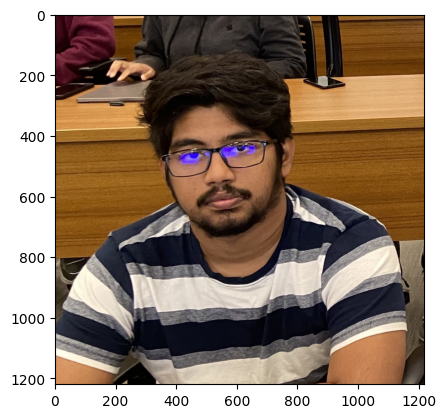

No faces found in the image
1/1 [==============================] - 0s 24ms/step


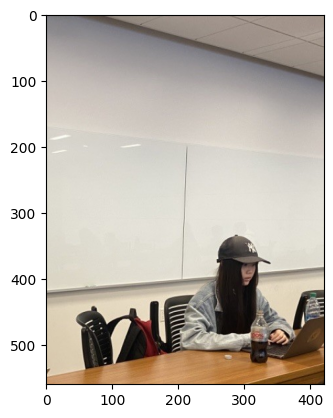

No faces found in the image
1/1 [==============================] - 0s 37ms/step


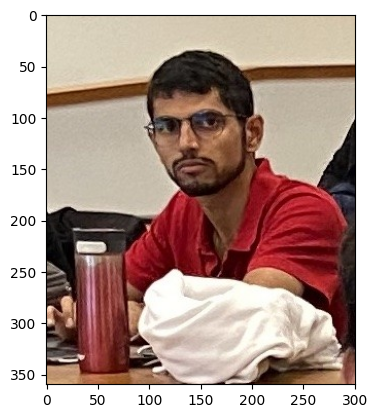

No faces found in the image
1/1 [==============================] - 0s 36ms/step


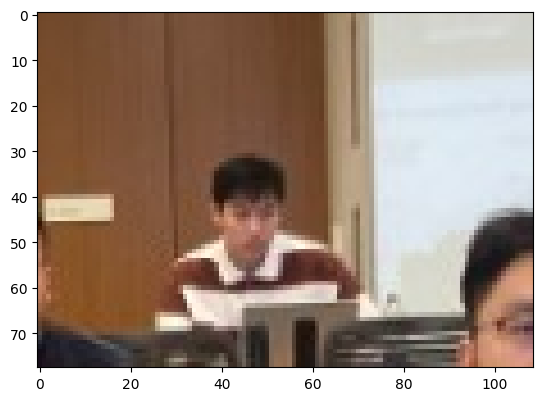

No faces found in the image
1/1 [==============================] - 0s 27ms/step


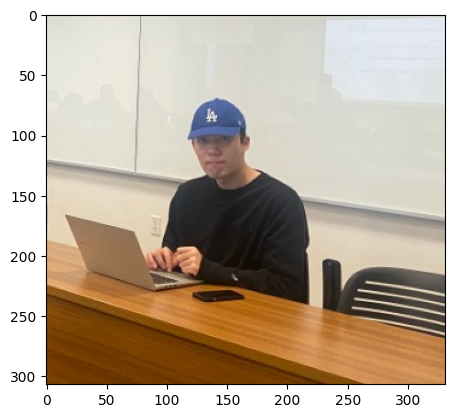

No faces found in the image
1/1 [==============================] - 0s 27ms/step


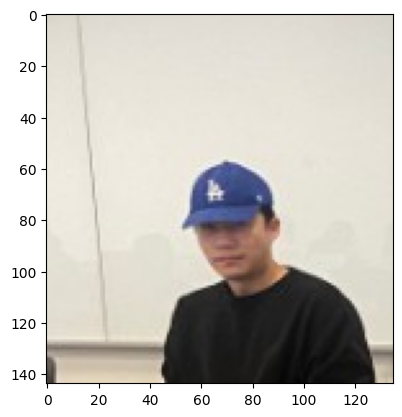

No faces found in the image
1/1 [==============================] - 0s 27ms/step
Processing completed.


In [ ]:
from mtcnn.mtcnn import MTCNN
input_directory = "/content/Changedformat"
output_directory = "/content/cropped"

detector = MTCNN()

for root, dirs, files in os.walk(input_directory):
    for file in files:
        original_file_path = os.path.join(root, file)
        relative_path = os.path.relpath(original_file_path, input_directory)
        output_file_path = os.path.join(output_directory, relative_path)
        output_subdirectory = os.path.dirname(output_file_path)
        if not os.path.exists(output_subdirectory):
            os.makedirs(output_subdirectory)

        image = cv2.imread(original_file_path)
        faces = detector.detect_faces(image)

        if len(faces) > 0:
            x, y, w, h = faces[0]['box']
            cropped_face = image[y:y+h, x:x+w]
            cv2.imwrite(output_file_path, cropped_face)
        else:
            cv2.imwrite(output_file_path, image)
            img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.show()
            print(f"No faces found in the image")

print("Processing completed.")


In [ ]:
def flip_images_in_folder(input_folder):
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            file_path = os.path.join(root, file)
            img = cv2.imread(file_path)
            flipped_img = cv2.flip(img, 1)
            filename, file_extension = os.path.splitext(file)
            new_filename = filename + '_flip' + file_extension
            flipped_file_path = os.path.join(root, new_filename)
            cv2.imwrite(flipped_file_path, flipped_img)
input_folder = '/content/cropped'
flip_images_in_folder(input_folder) #Flipping images before or after spliting there is only change in training accuracy().

In [ ]:
def load_data(directory):
    X = []
    y = []
    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory, label)):
            X.append(os.path.join(directory, label, filename))
            y.append(label)
    return X, y

In [ ]:
TRAIN_DIR = '/content/cropped'
train=pd.DataFrame()
train['image'], train['label']=load_data(TRAIN_DIR)

In [ ]:
print(train)

                                             image   label
0         /content/cropped/Qihui/1696545426962.jpg   Qihui
1    /content/cropped/Qihui/1696545426962_flip.jpg   Qihui
2                 /content/cropped/Qihui/qihui.jpg   Qihui
3         /content/cropped/Qihui/IMG_8537_flip.jpg   Qihui
4          /content/cropped/Qihui/qihui-1_flip.jpg   Qihui
..                                             ...     ...
523            /content/cropped/Yuhang/week5-1.jpg  Yuhang
524           /content/cropped/Yuhang/IMG_8533.jpg  Yuhang
525      /content/cropped/Yuhang/IMG_8533_flip.jpg  Yuhang
526       /content/cropped/Yuhang/week3-1_flip.jpg  Yuhang
527       /content/cropped/Yuhang/week3-2_flip.jpg  Yuhang

[528 rows x 2 columns]


In [ ]:
from PIL import Image
from keras.preprocessing import image
def extract_features(images):
    feature_list = []
    model = FaceNet()

    for img_path in tqdm(images):
        img = image.load_img(img_path, target_size=(160, 160))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        embeddings = model.embeddings(img_array)
        feature_list.append(embeddings)

    features = np.vstack(feature_list)
    return features


In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/528 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/528 [00:02<20:17,  2.31s/it]

1/1 [==============================] - 0s 94ms/step


  0%|          | 2/528 [00:02<09:26,  1.08s/it]

1/1 [==============================] - 0s 96ms/step


  1%|          | 3/528 [00:02<05:44,  1.52it/s]

1/1 [==============================] - 0s 95ms/step


  1%|          | 4/528 [00:02<04:13,  2.07it/s]

1/1 [==============================] - 0s 106ms/step


  1%|          | 5/528 [00:03<03:22,  2.58it/s]

1/1 [==============================] - 0s 98ms/step


  1%|          | 6/528 [00:03<02:52,  3.02it/s]

1/1 [==============================] - 0s 92ms/step


  1%|▏         | 7/528 [00:03<02:32,  3.41it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 8/528 [00:03<02:10,  3.99it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 9/528 [00:03<01:54,  4.51it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 10/528 [00:04<01:54,  4.54it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▏         | 11/528 [00:04<01:43,  5.00it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▏         | 12/528 [00:04<01:46,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▏         | 13/528 [00:04<01:47,  4.79it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 14/528 [00:04<01:48,  4.75it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 15/528 [00:05<01:51,  4.60it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 16/528 [00:05<01:42,  5.00it/s]

1/1 [==============================] - 0s 94ms/step


  3%|▎         | 17/528 [00:05<01:34,  5.40it/s]

1/1 [==============================] - 0s 94ms/step


  3%|▎         | 18/528 [00:05<01:39,  5.12it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▎         | 19/528 [00:05<01:32,  5.50it/s]

1/1 [==============================] - 0s 99ms/step


  4%|▍         | 20/528 [00:06<01:37,  5.21it/s]

1/1 [==============================] - 0s 101ms/step


  4%|▍         | 21/528 [00:06<01:32,  5.48it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 22/528 [00:06<01:37,  5.20it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 23/528 [00:06<01:30,  5.57it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 24/528 [00:06<01:37,  5.19it/s]

1/1 [==============================] - 0s 102ms/step


  5%|▍         | 25/528 [00:06<01:39,  5.03it/s]

1/1 [==============================] - 0s 106ms/step


  5%|▍         | 26/528 [00:07<01:42,  4.89it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 27/528 [00:07<01:44,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 28/528 [00:07<01:45,  4.73it/s]

1/1 [==============================] - 0s 93ms/step


  5%|▌         | 29/528 [00:07<01:45,  4.72it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 30/528 [00:07<01:35,  5.21it/s]

1/1 [==============================] - 0s 105ms/step


  6%|▌         | 31/528 [00:08<01:40,  4.93it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 32/528 [00:08<01:33,  5.29it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▋         | 33/528 [00:08<01:30,  5.48it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▋         | 34/528 [00:08<01:36,  5.14it/s]

1/1 [==============================] - 0s 93ms/step


  7%|▋         | 35/528 [00:08<01:38,  4.98it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 36/528 [00:09<01:41,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


  7%|▋         | 37/528 [00:09<01:33,  5.25it/s]

1/1 [==============================] - 0s 96ms/step


  7%|▋         | 38/528 [00:09<01:28,  5.53it/s]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 39/528 [00:09<01:25,  5.73it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 40/528 [00:09<01:22,  5.93it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 41/528 [00:09<01:19,  6.12it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 42/528 [00:10<01:19,  6.14it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 43/528 [00:10<01:28,  5.47it/s]

1/1 [==============================] - 0s 149ms/step


  8%|▊         | 44/528 [00:10<01:39,  4.87it/s]

1/1 [==============================] - 0s 160ms/step


  9%|▊         | 45/528 [00:10<01:45,  4.58it/s]

1/1 [==============================] - 0s 151ms/step


  9%|▊         | 46/528 [00:11<01:50,  4.38it/s]

1/1 [==============================] - 0s 181ms/step


  9%|▉         | 47/528 [00:11<01:55,  4.17it/s]

1/1 [==============================] - 0s 149ms/step


  9%|▉         | 48/528 [00:11<01:54,  4.18it/s]

1/1 [==============================] - 0s 144ms/step


  9%|▉         | 49/528 [00:11<01:56,  4.11it/s]

1/1 [==============================] - 0s 158ms/step


  9%|▉         | 50/528 [00:12<01:55,  4.15it/s]

1/1 [==============================] - 0s 155ms/step


 10%|▉         | 51/528 [00:12<01:55,  4.14it/s]

1/1 [==============================] - 0s 169ms/step


 10%|▉         | 52/528 [00:12<01:58,  4.03it/s]

1/1 [==============================] - 0s 167ms/step


 10%|█         | 53/528 [00:12<01:58,  4.01it/s]

1/1 [==============================] - 0s 161ms/step


 10%|█         | 54/528 [00:13<01:58,  3.99it/s]

1/1 [==============================] - 0s 155ms/step


 10%|█         | 55/528 [00:13<01:55,  4.08it/s]

1/1 [==============================] - 0s 159ms/step


 11%|█         | 56/528 [00:13<01:55,  4.09it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█         | 57/528 [00:14<02:19,  3.38it/s]

1/1 [==============================] - 0s 155ms/step


 11%|█         | 58/528 [00:14<02:12,  3.56it/s]

1/1 [==============================] - 0s 153ms/step


 11%|█         | 59/528 [00:14<02:04,  3.76it/s]

1/1 [==============================] - 0s 160ms/step


 11%|█▏        | 60/528 [00:14<02:02,  3.81it/s]

1/1 [==============================] - 0s 147ms/step


 12%|█▏        | 61/528 [00:14<01:59,  3.92it/s]

1/1 [==============================] - 0s 154ms/step


 12%|█▏        | 62/528 [00:15<01:59,  3.90it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█▏        | 63/528 [00:15<01:59,  3.89it/s]

1/1 [==============================] - 0s 165ms/step


 12%|█▏        | 64/528 [00:15<01:58,  3.91it/s]

1/1 [==============================] - 0s 158ms/step


 12%|█▏        | 65/528 [00:16<01:56,  3.97it/s]

1/1 [==============================] - 0s 147ms/step


 12%|█▎        | 66/528 [00:16<01:53,  4.06it/s]

1/1 [==============================] - 0s 157ms/step


 13%|█▎        | 67/528 [00:16<01:51,  4.14it/s]

1/1 [==============================] - 0s 159ms/step


 13%|█▎        | 68/528 [00:16<01:51,  4.14it/s]

1/1 [==============================] - 0s 148ms/step


 13%|█▎        | 69/528 [00:16<01:55,  3.96it/s]

1/1 [==============================] - 0s 157ms/step


 13%|█▎        | 70/528 [00:17<01:54,  3.98it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 71/528 [00:17<01:53,  4.02it/s]

1/1 [==============================] - 0s 106ms/step


 14%|█▎        | 72/528 [00:17<01:49,  4.18it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 73/528 [00:17<01:36,  4.71it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 74/528 [00:18<01:28,  5.14it/s]

1/1 [==============================] - 0s 97ms/step


 14%|█▍        | 75/528 [00:18<01:30,  4.99it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 76/528 [00:18<01:23,  5.40it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▍        | 77/528 [00:18<01:18,  5.74it/s]

1/1 [==============================] - 0s 110ms/step


 15%|█▍        | 78/528 [00:18<01:26,  5.22it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▍        | 79/528 [00:18<01:29,  5.02it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 80/528 [00:19<01:23,  5.37it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▌        | 81/528 [00:19<01:27,  5.11it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 82/528 [00:19<01:21,  5.49it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 83/528 [00:19<01:25,  5.18it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▌        | 84/528 [00:19<01:29,  4.98it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▌        | 85/528 [00:20<01:23,  5.34it/s]

1/1 [==============================] - 0s 94ms/step


 16%|█▋        | 86/528 [00:20<01:17,  5.67it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▋        | 87/528 [00:20<01:24,  5.20it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 88/528 [00:20<01:27,  5.03it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 89/528 [00:20<01:31,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█▋        | 90/528 [00:21<01:31,  4.77it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 91/528 [00:21<01:32,  4.74it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 92/528 [00:21<01:32,  4.71it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 93/528 [00:21<01:26,  5.05it/s]

1/1 [==============================] - 0s 96ms/step


 18%|█▊        | 94/528 [00:21<01:21,  5.35it/s]

1/1 [==============================] - 0s 94ms/step


 18%|█▊        | 95/528 [00:22<01:16,  5.63it/s]

1/1 [==============================] - 0s 95ms/step


 18%|█▊        | 96/528 [00:22<01:14,  5.76it/s]

1/1 [==============================] - 0s 97ms/step


 18%|█▊        | 97/528 [00:22<01:12,  5.93it/s]

1/1 [==============================] - 0s 96ms/step


 19%|█▊        | 98/528 [00:22<01:10,  6.10it/s]

1/1 [==============================] - 0s 94ms/step


 19%|█▉        | 99/528 [00:22<01:09,  6.18it/s]

1/1 [==============================] - 0s 108ms/step


 19%|█▉        | 100/528 [00:22<01:16,  5.60it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 101/528 [00:23<01:13,  5.82it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 102/528 [00:23<01:18,  5.45it/s]

1/1 [==============================] - 0s 96ms/step


 20%|█▉        | 103/528 [00:23<01:13,  5.76it/s]

1/1 [==============================] - 0s 95ms/step


 20%|█▉        | 104/528 [00:23<01:11,  5.95it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 105/528 [00:23<01:18,  5.39it/s]

1/1 [==============================] - 0s 96ms/step


 20%|██        | 106/528 [00:23<01:15,  5.62it/s]

1/1 [==============================] - 0s 93ms/step


 20%|██        | 107/528 [00:24<01:19,  5.28it/s]

1/1 [==============================] - 0s 94ms/step


 20%|██        | 108/528 [00:24<01:22,  5.07it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 109/528 [00:24<01:16,  5.47it/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 110/528 [00:24<01:20,  5.20it/s]

1/1 [==============================] - 0s 102ms/step


 21%|██        | 111/528 [00:24<01:24,  4.95it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 112/528 [00:25<01:26,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██▏       | 113/528 [00:25<01:27,  4.75it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 114/528 [00:25<01:28,  4.69it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 115/528 [00:26<02:26,  2.81it/s]

1/1 [==============================] - 0s 105ms/step


 22%|██▏       | 116/528 [00:26<02:03,  3.33it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 117/528 [00:26<01:53,  3.61it/s]

1/1 [==============================] - 0s 109ms/step


 22%|██▏       | 118/528 [00:26<01:41,  4.05it/s]

1/1 [==============================] - 0s 102ms/step


 23%|██▎       | 119/528 [00:27<01:39,  4.11it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 120/528 [00:27<01:29,  4.57it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 121/528 [00:27<01:29,  4.54it/s]

1/1 [==============================] - 0s 160ms/step


 23%|██▎       | 122/528 [00:27<01:37,  4.16it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 123/528 [00:28<01:40,  4.01it/s]

1/1 [==============================] - 0s 167ms/step


 23%|██▎       | 124/528 [00:28<01:42,  3.96it/s]

1/1 [==============================] - 0s 166ms/step


 24%|██▎       | 125/528 [00:28<01:43,  3.89it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██▍       | 126/528 [00:28<01:44,  3.84it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██▍       | 127/528 [00:29<01:45,  3.81it/s]

1/1 [==============================] - 0s 158ms/step


 24%|██▍       | 128/528 [00:29<01:42,  3.89it/s]

1/1 [==============================] - 0s 161ms/step


 24%|██▍       | 129/528 [00:29<01:40,  3.95it/s]

1/1 [==============================] - 0s 171ms/step


 25%|██▍       | 130/528 [00:29<01:41,  3.90it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 131/528 [00:30<01:47,  3.69it/s]

1/1 [==============================] - 0s 174ms/step


 25%|██▌       | 132/528 [00:30<01:47,  3.69it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▌       | 133/528 [00:30<01:44,  3.80it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▌       | 134/528 [00:30<01:43,  3.79it/s]

1/1 [==============================] - 0s 165ms/step


 26%|██▌       | 135/528 [00:31<01:43,  3.81it/s]

1/1 [==============================] - 0s 169ms/step


 26%|██▌       | 136/528 [00:31<01:41,  3.85it/s]

1/1 [==============================] - 0s 160ms/step


 26%|██▌       | 137/528 [00:31<01:42,  3.83it/s]

1/1 [==============================] - 0s 155ms/step


 26%|██▌       | 138/528 [00:31<01:40,  3.88it/s]

1/1 [==============================] - 0s 158ms/step


 26%|██▋       | 139/528 [00:32<01:40,  3.89it/s]

1/1 [==============================] - 0s 169ms/step


 27%|██▋       | 140/528 [00:32<01:42,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 141/528 [00:32<01:43,  3.73it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 142/528 [00:33<01:43,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 27%|██▋       | 143/528 [00:33<01:42,  3.75it/s]

1/1 [==============================] - 0s 165ms/step


 27%|██▋       | 144/528 [00:33<01:40,  3.84it/s]

1/1 [==============================] - 0s 160ms/step


 27%|██▋       | 145/528 [00:33<01:38,  3.88it/s]

1/1 [==============================] - 0s 160ms/step


 28%|██▊       | 146/528 [00:34<01:39,  3.85it/s]

1/1 [==============================] - 0s 164ms/step


 28%|██▊       | 147/528 [00:34<01:40,  3.78it/s]

1/1 [==============================] - 0s 157ms/step


 28%|██▊       | 148/528 [00:34<01:40,  3.78it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 149/528 [00:34<01:37,  3.90it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██▊       | 150/528 [00:35<01:26,  4.38it/s]

1/1 [==============================] - 0s 110ms/step


 29%|██▊       | 151/528 [00:35<01:21,  4.65it/s]

1/1 [==============================] - 0s 104ms/step


 29%|██▉       | 152/528 [00:35<01:22,  4.57it/s]

1/1 [==============================] - 0s 102ms/step


 29%|██▉       | 153/528 [00:35<01:16,  4.93it/s]

1/1 [==============================] - 0s 111ms/step


 29%|██▉       | 154/528 [00:35<01:18,  4.76it/s]

1/1 [==============================] - 0s 95ms/step


 29%|██▉       | 155/528 [00:35<01:12,  5.13it/s]

1/1 [==============================] - 0s 96ms/step


 30%|██▉       | 156/528 [00:36<01:15,  4.92it/s]

1/1 [==============================] - 0s 94ms/step


 30%|██▉       | 157/528 [00:36<01:18,  4.74it/s]

1/1 [==============================] - 0s 104ms/step


 30%|██▉       | 158/528 [00:36<01:20,  4.60it/s]

1/1 [==============================] - 0s 104ms/step


 30%|███       | 159/528 [00:36<01:21,  4.55it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███       | 160/528 [00:37<01:21,  4.53it/s]

1/1 [==============================] - 0s 107ms/step


 30%|███       | 161/528 [00:37<01:22,  4.47it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███       | 162/528 [00:37<01:14,  4.89it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███       | 163/528 [00:37<01:16,  4.76it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███       | 164/528 [00:37<01:11,  5.08it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███▏      | 165/528 [00:38<01:13,  4.91it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███▏      | 166/528 [00:38<01:16,  4.75it/s]

1/1 [==============================] - 0s 99ms/step


 32%|███▏      | 167/528 [00:38<01:12,  4.99it/s]

1/1 [==============================] - 0s 101ms/step


 32%|███▏      | 168/528 [00:38<01:08,  5.27it/s]

1/1 [==============================] - 0s 99ms/step


 32%|███▏      | 169/528 [00:38<01:05,  5.49it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 170/528 [00:39<01:09,  5.15it/s]

1/1 [==============================] - 0s 98ms/step


 32%|███▏      | 171/528 [00:39<01:11,  4.96it/s]

1/1 [==============================] - 0s 94ms/step


 33%|███▎      | 172/528 [00:39<01:14,  4.77it/s]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 173/528 [00:39<01:15,  4.70it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 174/528 [00:39<01:09,  5.09it/s]

1/1 [==============================] - 0s 98ms/step


 33%|███▎      | 175/528 [00:40<01:11,  4.93it/s]

1/1 [==============================] - 0s 98ms/step


 33%|███▎      | 176/528 [00:40<01:14,  4.72it/s]

1/1 [==============================] - 0s 95ms/step


 34%|███▎      | 177/528 [00:40<01:15,  4.67it/s]

1/1 [==============================] - 0s 97ms/step


 34%|███▎      | 178/528 [00:40<01:15,  4.63it/s]

1/1 [==============================] - 0s 94ms/step


 34%|███▍      | 179/528 [00:40<01:09,  5.03it/s]

1/1 [==============================] - 0s 98ms/step


 34%|███▍      | 180/528 [00:41<01:06,  5.23it/s]

1/1 [==============================] - 0s 97ms/step


 34%|███▍      | 181/528 [00:41<01:10,  4.91it/s]

1/1 [==============================] - 0s 99ms/step


 34%|███▍      | 182/528 [00:41<01:11,  4.82it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▍      | 183/528 [00:41<01:06,  5.20it/s]

1/1 [==============================] - 0s 96ms/step


 35%|███▍      | 184/528 [00:41<01:09,  4.96it/s]

1/1 [==============================] - 0s 100ms/step


 35%|███▌      | 185/528 [00:42<01:05,  5.20it/s]

1/1 [==============================] - 0s 100ms/step


 35%|███▌      | 186/528 [00:42<01:09,  4.95it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▌      | 187/528 [00:42<01:11,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 188/528 [00:42<01:05,  5.18it/s]

1/1 [==============================] - 0s 103ms/step


 36%|███▌      | 189/528 [00:42<01:07,  5.00it/s]

1/1 [==============================] - 0s 100ms/step


 36%|███▌      | 190/528 [00:43<01:03,  5.28it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 191/528 [00:43<01:06,  5.09it/s]

1/1 [==============================] - 0s 97ms/step


 36%|███▋      | 192/528 [00:43<01:08,  4.89it/s]

1/1 [==============================] - 0s 95ms/step


 37%|███▋      | 193/528 [00:43<01:03,  5.25it/s]

1/1 [==============================] - 0s 102ms/step


 37%|███▋      | 194/528 [00:43<01:02,  5.36it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 195/528 [00:44<01:07,  4.95it/s]

1/1 [==============================] - 0s 95ms/step


 37%|███▋      | 196/528 [00:44<01:02,  5.32it/s]

1/1 [==============================] - 0s 106ms/step


 37%|███▋      | 197/528 [00:44<01:00,  5.46it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 198/528 [00:44<01:03,  5.18it/s]

1/1 [==============================] - 0s 160ms/step


 38%|███▊      | 199/528 [00:44<01:09,  4.72it/s]

1/1 [==============================] - 0s 165ms/step


 38%|███▊      | 200/528 [00:45<01:13,  4.49it/s]

1/1 [==============================] - 0s 154ms/step


 38%|███▊      | 201/528 [00:45<01:15,  4.35it/s]

1/1 [==============================] - 0s 161ms/step


 38%|███▊      | 202/528 [00:45<01:16,  4.25it/s]

1/1 [==============================] - 0s 162ms/step


 38%|███▊      | 203/528 [00:45<01:18,  4.16it/s]

1/1 [==============================] - 0s 165ms/step


 39%|███▊      | 204/528 [00:46<01:18,  4.10it/s]

1/1 [==============================] - 0s 149ms/step


 39%|███▉      | 205/528 [00:46<01:17,  4.17it/s]

1/1 [==============================] - 0s 179ms/step


 39%|███▉      | 206/528 [00:46<01:19,  4.07it/s]

1/1 [==============================] - 0s 148ms/step


 39%|███▉      | 207/528 [00:46<01:19,  4.06it/s]

1/1 [==============================] - 0s 156ms/step


 39%|███▉      | 208/528 [00:47<01:19,  4.03it/s]

1/1 [==============================] - 0s 153ms/step


 40%|███▉      | 209/528 [00:47<01:18,  4.07it/s]

1/1 [==============================] - 0s 155ms/step


 40%|███▉      | 210/528 [00:47<01:18,  4.04it/s]

1/1 [==============================] - 0s 152ms/step


 40%|███▉      | 211/528 [00:47<01:19,  4.00it/s]

1/1 [==============================] - 0s 155ms/step


 40%|████      | 212/528 [00:48<01:17,  4.07it/s]

1/1 [==============================] - 0s 159ms/step


 40%|████      | 213/528 [00:48<01:16,  4.11it/s]

1/1 [==============================] - 0s 167ms/step


 41%|████      | 214/528 [00:48<01:16,  4.09it/s]

1/1 [==============================] - 0s 161ms/step


 41%|████      | 215/528 [00:48<01:19,  3.92it/s]

1/1 [==============================] - 0s 152ms/step


 41%|████      | 216/528 [00:49<01:17,  4.00it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████      | 217/528 [00:49<01:17,  4.00it/s]

1/1 [==============================] - 0s 163ms/step


 41%|████▏     | 218/528 [00:49<01:16,  4.03it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████▏     | 219/528 [00:49<01:17,  3.97it/s]

1/1 [==============================] - 0s 176ms/step


 42%|████▏     | 220/528 [00:50<01:20,  3.82it/s]

1/1 [==============================] - 0s 168ms/step


 42%|████▏     | 221/528 [00:50<01:19,  3.85it/s]

1/1 [==============================] - 0s 156ms/step


 42%|████▏     | 222/528 [00:50<01:17,  3.93it/s]

1/1 [==============================] - 0s 176ms/step


 42%|████▏     | 223/528 [00:50<01:20,  3.78it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 224/528 [00:51<01:21,  3.75it/s]

1/1 [==============================] - 0s 147ms/step


 43%|████▎     | 225/528 [00:51<01:17,  3.93it/s]

1/1 [==============================] - 0s 145ms/step


 43%|████▎     | 226/528 [00:51<01:16,  3.96it/s]

1/1 [==============================] - 0s 165ms/step


 43%|████▎     | 227/528 [00:51<01:15,  3.99it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 228/528 [00:52<01:15,  3.96it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 229/528 [00:52<01:13,  4.08it/s]

1/1 [==============================] - 0s 97ms/step


 44%|████▎     | 230/528 [00:52<01:10,  4.23it/s]

1/1 [==============================] - 0s 95ms/step


 44%|████▍     | 231/528 [00:52<01:03,  4.70it/s]

1/1 [==============================] - 0s 101ms/step


 44%|████▍     | 232/528 [00:52<00:59,  4.99it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████▍     | 233/528 [00:53<00:56,  5.21it/s]

1/1 [==============================] - 0s 101ms/step


 44%|████▍     | 234/528 [00:53<00:54,  5.39it/s]

1/1 [==============================] - 0s 97ms/step


 45%|████▍     | 235/528 [00:53<00:57,  5.08it/s]

1/1 [==============================] - 0s 98ms/step


 45%|████▍     | 236/528 [00:53<00:54,  5.37it/s]

1/1 [==============================] - 0s 98ms/step


 45%|████▍     | 237/528 [00:53<00:52,  5.54it/s]

1/1 [==============================] - 0s 98ms/step


 45%|████▌     | 238/528 [00:54<00:57,  5.05it/s]

1/1 [==============================] - 0s 96ms/step


 45%|████▌     | 239/528 [00:54<00:53,  5.42it/s]

1/1 [==============================] - 0s 96ms/step


 45%|████▌     | 240/528 [00:54<00:51,  5.64it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 241/528 [00:54<00:54,  5.27it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 242/528 [00:54<00:52,  5.44it/s]

1/1 [==============================] - 0s 107ms/step


 46%|████▌     | 243/528 [00:54<00:51,  5.59it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████▌     | 244/528 [00:55<00:48,  5.82it/s]

1/1 [==============================] - 0s 104ms/step


 46%|████▋     | 245/528 [00:55<00:48,  5.86it/s]

1/1 [==============================] - 0s 101ms/step


 47%|████▋     | 246/528 [00:55<00:52,  5.39it/s]

1/1 [==============================] - 0s 100ms/step


 47%|████▋     | 247/528 [00:55<00:55,  5.03it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 248/528 [00:55<00:56,  4.92it/s]

1/1 [==============================] - 0s 101ms/step


 47%|████▋     | 249/528 [00:56<00:58,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 250/528 [00:56<00:54,  5.14it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 251/528 [00:56<00:50,  5.47it/s]

1/1 [==============================] - 0s 104ms/step


 48%|████▊     | 252/528 [00:56<00:53,  5.13it/s]

1/1 [==============================] - 0s 98ms/step


 48%|████▊     | 253/528 [00:56<00:55,  4.97it/s]

1/1 [==============================] - 0s 103ms/step


 48%|████▊     | 254/528 [00:57<00:56,  4.82it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 255/528 [00:57<00:52,  5.23it/s]

1/1 [==============================] - 0s 97ms/step


 48%|████▊     | 256/528 [00:57<00:50,  5.43it/s]

1/1 [==============================] - 0s 96ms/step


 49%|████▊     | 257/528 [00:57<00:48,  5.62it/s]

1/1 [==============================] - 0s 96ms/step


 49%|████▉     | 258/528 [00:57<00:51,  5.28it/s]

1/1 [==============================] - 0s 104ms/step


 49%|████▉     | 259/528 [00:58<00:49,  5.45it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▉     | 260/528 [00:58<00:47,  5.69it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▉     | 261/528 [00:58<00:50,  5.26it/s]

1/1 [==============================] - 0s 97ms/step


 50%|████▉     | 262/528 [00:58<00:52,  5.06it/s]

1/1 [==============================] - 0s 91ms/step


 50%|████▉     | 263/528 [00:58<00:49,  5.40it/s]

1/1 [==============================] - 0s 91ms/step


 50%|█████     | 264/528 [00:59<00:51,  5.11it/s]

1/1 [==============================] - 0s 101ms/step


 50%|█████     | 265/528 [00:59<00:49,  5.34it/s]

1/1 [==============================] - 0s 94ms/step


 50%|█████     | 266/528 [00:59<00:47,  5.51it/s]

1/1 [==============================] - 0s 95ms/step


 51%|█████     | 267/528 [00:59<00:50,  5.21it/s]

1/1 [==============================] - 0s 95ms/step


 51%|█████     | 268/528 [00:59<00:47,  5.43it/s]

1/1 [==============================] - 0s 93ms/step


 51%|█████     | 269/528 [00:59<00:50,  5.17it/s]

1/1 [==============================] - 0s 103ms/step


 51%|█████     | 270/528 [01:00<00:52,  4.94it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████▏    | 271/528 [01:00<00:52,  4.85it/s]

1/1 [==============================] - 0s 90ms/step


 52%|█████▏    | 272/528 [01:00<00:53,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 52%|█████▏    | 273/528 [01:00<00:53,  4.73it/s]

1/1 [==============================] - 0s 101ms/step


 52%|█████▏    | 274/528 [01:01<00:54,  4.65it/s]

1/1 [==============================] - 0s 97ms/step


 52%|█████▏    | 275/528 [01:01<00:54,  4.60it/s]

1/1 [==============================] - 0s 96ms/step


 52%|█████▏    | 276/528 [01:01<00:50,  5.02it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 277/528 [01:01<00:46,  5.36it/s]

1/1 [==============================] - 0s 98ms/step


 53%|█████▎    | 278/528 [01:01<00:49,  5.06it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 279/528 [01:01<00:45,  5.41it/s]

1/1 [==============================] - 0s 147ms/step


 53%|█████▎    | 280/528 [01:02<00:47,  5.20it/s]

1/1 [==============================] - 0s 147ms/step


 53%|█████▎    | 281/528 [01:02<00:51,  4.75it/s]

1/1 [==============================] - 0s 163ms/step


 53%|█████▎    | 282/528 [01:02<00:54,  4.54it/s]

1/1 [==============================] - 0s 149ms/step


 54%|█████▎    | 283/528 [01:02<00:58,  4.20it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 284/528 [01:03<00:58,  4.15it/s]

1/1 [==============================] - 0s 150ms/step


 54%|█████▍    | 285/528 [01:03<00:59,  4.11it/s]

1/1 [==============================] - 0s 156ms/step


 54%|█████▍    | 286/528 [01:03<00:59,  4.08it/s]

1/1 [==============================] - 0s 158ms/step


 54%|█████▍    | 287/528 [01:03<00:59,  4.08it/s]

1/1 [==============================] - 0s 159ms/step


 55%|█████▍    | 288/528 [01:04<00:59,  4.03it/s]

1/1 [==============================] - 0s 159ms/step


 55%|█████▍    | 289/528 [01:04<00:59,  4.02it/s]

1/1 [==============================] - 0s 161ms/step


 55%|█████▍    | 290/528 [01:04<00:59,  4.03it/s]

1/1 [==============================] - 0s 162ms/step


 55%|█████▌    | 291/528 [01:04<00:59,  3.95it/s]

1/1 [==============================] - 0s 154ms/step


 55%|█████▌    | 292/528 [01:05<01:00,  3.93it/s]

1/1 [==============================] - 0s 153ms/step


 55%|█████▌    | 293/528 [01:05<01:00,  3.91it/s]

1/1 [==============================] - 0s 160ms/step


 56%|█████▌    | 294/528 [01:05<00:58,  3.97it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▌    | 295/528 [01:05<00:58,  3.97it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 296/528 [01:06<00:59,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▋    | 297/528 [01:06<01:01,  3.77it/s]

1/1 [==============================] - 0s 155ms/step


 56%|█████▋    | 298/528 [01:06<01:01,  3.75it/s]

1/1 [==============================] - 0s 165ms/step


 57%|█████▋    | 299/528 [01:07<01:01,  3.73it/s]

1/1 [==============================] - 0s 161ms/step


 57%|█████▋    | 300/528 [01:07<01:02,  3.67it/s]

1/1 [==============================] - 0s 165ms/step


 57%|█████▋    | 301/528 [01:07<01:02,  3.65it/s]

1/1 [==============================] - 0s 245ms/step


 57%|█████▋    | 302/528 [01:08<01:16,  2.97it/s]

1/1 [==============================] - 0s 215ms/step


 57%|█████▋    | 303/528 [01:08<01:15,  2.98it/s]

1/1 [==============================] - 0s 205ms/step


 58%|█████▊    | 304/528 [01:08<01:14,  3.01it/s]

1/1 [==============================] - 0s 163ms/step


 58%|█████▊    | 305/528 [01:09<01:08,  3.25it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 306/528 [01:09<01:16,  2.89it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 307/528 [01:09<01:24,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 308/528 [01:10<01:28,  2.49it/s]

1/1 [==============================] - 0s 232ms/step


 59%|█████▊    | 309/528 [01:10<01:32,  2.37it/s]

1/1 [==============================] - 0s 164ms/step


 59%|█████▊    | 310/528 [01:11<01:23,  2.62it/s]

1/1 [==============================] - 0s 156ms/step


 59%|█████▉    | 311/528 [01:11<01:14,  2.91it/s]

1/1 [==============================] - 0s 203ms/step


 59%|█████▉    | 312/528 [01:11<01:21,  2.65it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▉    | 313/528 [01:12<01:14,  2.90it/s]

1/1 [==============================] - 0s 156ms/step


 59%|█████▉    | 314/528 [01:12<01:07,  3.16it/s]

1/1 [==============================] - 0s 148ms/step


 60%|█████▉    | 315/528 [01:12<01:03,  3.37it/s]

1/1 [==============================] - 0s 160ms/step


 60%|█████▉    | 316/528 [01:12<01:01,  3.46it/s]

1/1 [==============================] - 0s 149ms/step


 60%|██████    | 317/528 [01:13<00:58,  3.63it/s]

1/1 [==============================] - 0s 163ms/step


 60%|██████    | 318/528 [01:13<00:56,  3.71it/s]

1/1 [==============================] - 0s 164ms/step


 60%|██████    | 319/528 [01:13<00:56,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 61%|██████    | 320/528 [01:13<00:56,  3.68it/s]

1/1 [==============================] - 0s 149ms/step


 61%|██████    | 321/528 [01:14<00:57,  3.62it/s]

1/1 [==============================] - 0s 153ms/step


 61%|██████    | 322/528 [01:14<00:54,  3.79it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 323/528 [01:14<00:53,  3.85it/s]

1/1 [==============================] - 0s 177ms/step


 61%|██████▏   | 324/528 [01:14<00:53,  3.81it/s]

1/1 [==============================] - 0s 160ms/step


 62%|██████▏   | 325/528 [01:15<00:52,  3.83it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 326/528 [01:15<00:51,  3.90it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 327/528 [01:15<00:50,  4.00it/s]

1/1 [==============================] - 0s 98ms/step


 62%|██████▏   | 328/528 [01:15<00:48,  4.11it/s]

1/1 [==============================] - 0s 97ms/step


 62%|██████▏   | 329/528 [01:16<00:47,  4.21it/s]

1/1 [==============================] - 0s 108ms/step


 62%|██████▎   | 330/528 [01:16<00:43,  4.57it/s]

1/1 [==============================] - 0s 97ms/step


 63%|██████▎   | 331/528 [01:16<00:40,  4.83it/s]

1/1 [==============================] - 0s 98ms/step


 63%|██████▎   | 332/528 [01:16<00:38,  5.14it/s]

1/1 [==============================] - 0s 100ms/step


 63%|██████▎   | 333/528 [01:16<00:37,  5.27it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 334/528 [01:17<00:39,  4.93it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 335/528 [01:17<00:40,  4.82it/s]

1/1 [==============================] - 0s 97ms/step


 64%|██████▎   | 336/528 [01:17<00:40,  4.71it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▍   | 337/528 [01:17<00:38,  4.98it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▍   | 338/528 [01:17<00:40,  4.71it/s]

1/1 [==============================] - 0s 94ms/step


 64%|██████▍   | 339/528 [01:18<00:40,  4.66it/s]

1/1 [==============================] - 0s 102ms/step


 64%|██████▍   | 340/528 [01:18<00:40,  4.65it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▍   | 341/528 [01:18<00:37,  5.04it/s]

1/1 [==============================] - 0s 99ms/step


 65%|██████▍   | 342/528 [01:18<00:34,  5.35it/s]

1/1 [==============================] - 0s 94ms/step


 65%|██████▍   | 343/528 [01:18<00:36,  5.05it/s]

1/1 [==============================] - 0s 99ms/step


 65%|██████▌   | 344/528 [01:19<00:35,  5.24it/s]

1/1 [==============================] - 0s 96ms/step


 65%|██████▌   | 345/528 [01:19<00:33,  5.40it/s]

1/1 [==============================] - 0s 102ms/step


 66%|██████▌   | 346/528 [01:19<00:36,  4.95it/s]

1/1 [==============================] - 0s 100ms/step


 66%|██████▌   | 347/528 [01:19<00:35,  5.09it/s]

1/1 [==============================] - 0s 113ms/step


 66%|██████▌   | 348/528 [01:19<00:35,  5.14it/s]

1/1 [==============================] - 0s 123ms/step


 66%|██████▌   | 349/528 [01:20<00:36,  4.84it/s]

1/1 [==============================] - 0s 103ms/step


 66%|██████▋   | 350/528 [01:20<00:35,  5.08it/s]

1/1 [==============================] - 0s 102ms/step


 66%|██████▋   | 351/528 [01:20<00:36,  4.79it/s]

1/1 [==============================] - 0s 110ms/step


 67%|██████▋   | 352/528 [01:20<00:35,  4.98it/s]

1/1 [==============================] - 0s 95ms/step


 67%|██████▋   | 353/528 [01:20<00:36,  4.83it/s]

1/1 [==============================] - 0s 102ms/step


 67%|██████▋   | 354/528 [01:21<00:33,  5.16it/s]

1/1 [==============================] - 0s 94ms/step


 67%|██████▋   | 355/528 [01:21<00:35,  4.84it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████▋   | 356/528 [01:21<00:36,  4.72it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 357/528 [01:21<00:33,  5.06it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████▊   | 358/528 [01:21<00:34,  4.88it/s]

1/1 [==============================] - 0s 166ms/step


 68%|██████▊   | 359/528 [01:22<00:37,  4.57it/s]

1/1 [==============================] - 0s 155ms/step


 68%|██████▊   | 360/528 [01:22<00:39,  4.29it/s]

1/1 [==============================] - 0s 153ms/step


 68%|██████▊   | 361/528 [01:22<00:40,  4.16it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▊   | 362/528 [01:22<00:40,  4.07it/s]

1/1 [==============================] - 0s 168ms/step


 69%|██████▉   | 363/528 [01:23<00:42,  3.92it/s]

1/1 [==============================] - 0s 160ms/step


 69%|██████▉   | 364/528 [01:23<00:41,  3.97it/s]

1/1 [==============================] - 0s 157ms/step


 69%|██████▉   | 365/528 [01:23<00:41,  3.96it/s]

1/1 [==============================] - 0s 149ms/step


 69%|██████▉   | 366/528 [01:23<00:39,  4.05it/s]

1/1 [==============================] - 0s 168ms/step


 70%|██████▉   | 367/528 [01:24<00:40,  3.93it/s]

1/1 [==============================] - 0s 158ms/step


 70%|██████▉   | 368/528 [01:24<00:40,  3.93it/s]

1/1 [==============================] - 0s 155ms/step


 70%|██████▉   | 369/528 [01:24<00:40,  3.95it/s]

1/1 [==============================] - 0s 149ms/step


 70%|███████   | 370/528 [01:24<00:39,  4.00it/s]

1/1 [==============================] - 0s 163ms/step


 70%|███████   | 371/528 [01:25<00:40,  3.90it/s]

1/1 [==============================] - 0s 150ms/step


 70%|███████   | 372/528 [01:25<00:40,  3.86it/s]

1/1 [==============================] - 0s 160ms/step


 71%|███████   | 373/528 [01:25<00:39,  3.88it/s]

1/1 [==============================] - 0s 160ms/step


 71%|███████   | 374/528 [01:26<00:39,  3.87it/s]

1/1 [==============================] - 0s 159ms/step


 71%|███████   | 375/528 [01:26<00:39,  3.89it/s]

1/1 [==============================] - 0s 152ms/step


 71%|███████   | 376/528 [01:26<00:39,  3.85it/s]

1/1 [==============================] - 0s 147ms/step


 71%|███████▏  | 377/528 [01:26<00:38,  3.90it/s]

1/1 [==============================] - 0s 153ms/step


 72%|███████▏  | 378/528 [01:27<00:37,  4.04it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 379/528 [01:27<00:37,  3.92it/s]

1/1 [==============================] - 0s 155ms/step


 72%|███████▏  | 380/528 [01:27<00:39,  3.79it/s]

1/1 [==============================] - 0s 160ms/step


 72%|███████▏  | 381/528 [01:27<00:39,  3.75it/s]

1/1 [==============================] - 0s 138ms/step


 72%|███████▏  | 382/528 [01:28<00:38,  3.80it/s]

1/1 [==============================] - 0s 150ms/step


 73%|███████▎  | 383/528 [01:28<00:37,  3.84it/s]

1/1 [==============================] - 0s 146ms/step


 73%|███████▎  | 384/528 [01:28<00:36,  3.93it/s]

1/1 [==============================] - 0s 152ms/step


 73%|███████▎  | 385/528 [01:28<00:35,  3.97it/s]

1/1 [==============================] - 0s 156ms/step


 73%|███████▎  | 386/528 [01:29<00:36,  3.92it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 387/528 [01:29<00:35,  3.96it/s]

1/1 [==============================] - 0s 92ms/step


 73%|███████▎  | 388/528 [01:29<00:35,  3.96it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▎  | 389/528 [01:29<00:31,  4.48it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▍  | 390/528 [01:29<00:28,  4.78it/s]

1/1 [==============================] - 0s 102ms/step


 74%|███████▍  | 391/528 [01:30<00:27,  5.06it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▍  | 392/528 [01:30<00:27,  4.91it/s]

1/1 [==============================] - 0s 107ms/step


 74%|███████▍  | 393/528 [01:30<00:26,  5.17it/s]

1/1 [==============================] - 0s 97ms/step


 75%|███████▍  | 394/528 [01:30<00:24,  5.42it/s]

1/1 [==============================] - 0s 98ms/step


 75%|███████▍  | 395/528 [01:30<00:24,  5.53it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▌  | 396/528 [01:31<00:25,  5.22it/s]

1/1 [==============================] - 0s 93ms/step


 75%|███████▌  | 397/528 [01:31<00:26,  5.00it/s]

1/1 [==============================] - 0s 100ms/step


 75%|███████▌  | 398/528 [01:31<00:24,  5.28it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 399/528 [01:31<00:24,  5.36it/s]

1/1 [==============================] - 0s 95ms/step


 76%|███████▌  | 400/528 [01:31<00:23,  5.49it/s]

1/1 [==============================] - 0s 100ms/step


 76%|███████▌  | 401/528 [01:32<00:24,  5.11it/s]

1/1 [==============================] - 0s 97ms/step


 76%|███████▌  | 402/528 [01:32<00:25,  4.94it/s]

1/1 [==============================] - 0s 103ms/step


 76%|███████▋  | 403/528 [01:32<00:26,  4.79it/s]

1/1 [==============================] - 0s 97ms/step


 77%|███████▋  | 404/528 [01:32<00:26,  4.65it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 405/528 [01:32<00:24,  4.99it/s]

1/1 [==============================] - 0s 97ms/step


 77%|███████▋  | 406/528 [01:33<00:23,  5.26it/s]

1/1 [==============================] - 0s 93ms/step


 77%|███████▋  | 407/528 [01:33<00:22,  5.44it/s]

1/1 [==============================] - 0s 96ms/step


 77%|███████▋  | 408/528 [01:33<00:21,  5.52it/s]

1/1 [==============================] - 0s 107ms/step


 77%|███████▋  | 409/528 [01:33<00:23,  5.14it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 410/528 [01:33<00:21,  5.46it/s]

1/1 [==============================] - 0s 94ms/step


 78%|███████▊  | 411/528 [01:33<00:22,  5.11it/s]

1/1 [==============================] - 0s 98ms/step


 78%|███████▊  | 412/528 [01:34<00:21,  5.41it/s]

1/1 [==============================] - 0s 101ms/step


 78%|███████▊  | 413/528 [01:34<00:22,  5.12it/s]

1/1 [==============================] - 0s 103ms/step


 78%|███████▊  | 414/528 [01:34<00:23,  4.93it/s]

1/1 [==============================] - 0s 98ms/step


 79%|███████▊  | 415/528 [01:34<00:23,  4.77it/s]

1/1 [==============================] - 0s 100ms/step


 79%|███████▉  | 416/528 [01:35<00:24,  4.65it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 417/528 [01:35<00:22,  5.04it/s]

1/1 [==============================] - 0s 97ms/step


 79%|███████▉  | 418/528 [01:35<00:22,  4.86it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▉  | 419/528 [01:35<00:22,  4.77it/s]

1/1 [==============================] - 0s 94ms/step


 80%|███████▉  | 420/528 [01:35<00:20,  5.15it/s]

1/1 [==============================] - 0s 95ms/step


 80%|███████▉  | 421/528 [01:35<00:19,  5.46it/s]

1/1 [==============================] - 0s 93ms/step


 80%|███████▉  | 422/528 [01:36<00:20,  5.09it/s]

1/1 [==============================] - 0s 97ms/step


 80%|████████  | 423/528 [01:36<00:21,  4.95it/s]

1/1 [==============================] - 0s 102ms/step


 80%|████████  | 424/528 [01:36<00:21,  4.84it/s]

1/1 [==============================] - 0s 98ms/step


 80%|████████  | 425/528 [01:36<00:22,  4.66it/s]

1/1 [==============================] - 0s 100ms/step


 81%|████████  | 426/528 [01:37<00:21,  4.64it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 427/528 [01:37<00:20,  4.98it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████  | 428/528 [01:37<00:20,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


 81%|████████▏ | 429/528 [01:37<00:20,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


 81%|████████▏ | 430/528 [01:37<00:19,  5.12it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████▏ | 431/528 [01:38<00:19,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 432/528 [01:38<00:18,  5.28it/s]

1/1 [==============================] - 0s 101ms/step


 82%|████████▏ | 433/528 [01:38<00:17,  5.49it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████▏ | 434/528 [01:38<00:16,  5.59it/s]

1/1 [==============================] - 0s 108ms/step


 82%|████████▏ | 435/528 [01:38<00:16,  5.59it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 436/528 [01:38<00:16,  5.75it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 437/528 [01:39<00:17,  5.28it/s]

1/1 [==============================] - 0s 92ms/step


 83%|████████▎ | 438/528 [01:39<00:16,  5.58it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████▎ | 439/528 [01:39<00:15,  5.66it/s]

1/1 [==============================] - 0s 163ms/step


 83%|████████▎ | 440/528 [01:39<00:17,  4.94it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▎ | 441/528 [01:39<00:19,  4.47it/s]

1/1 [==============================] - 0s 154ms/step


 84%|████████▎ | 442/528 [01:40<00:19,  4.34it/s]

1/1 [==============================] - 0s 167ms/step


 84%|████████▍ | 443/528 [01:40<00:20,  4.07it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▍ | 444/528 [01:40<00:20,  4.04it/s]

1/1 [==============================] - 0s 157ms/step


 84%|████████▍ | 445/528 [01:41<00:20,  4.04it/s]

1/1 [==============================] - 0s 151ms/step


 84%|████████▍ | 446/528 [01:41<00:20,  4.05it/s]

1/1 [==============================] - 0s 147ms/step


 85%|████████▍ | 447/528 [01:41<00:19,  4.10it/s]

1/1 [==============================] - 0s 155ms/step


 85%|████████▍ | 448/528 [01:41<00:19,  4.15it/s]

1/1 [==============================] - 0s 156ms/step


 85%|████████▌ | 449/528 [01:41<00:19,  4.00it/s]

1/1 [==============================] - 0s 160ms/step


 85%|████████▌ | 450/528 [01:42<00:19,  3.97it/s]

1/1 [==============================] - 0s 155ms/step


 85%|████████▌ | 451/528 [01:42<00:19,  3.89it/s]

1/1 [==============================] - 0s 156ms/step


 86%|████████▌ | 452/528 [01:42<00:19,  3.91it/s]

1/1 [==============================] - 0s 158ms/step


 86%|████████▌ | 453/528 [01:43<00:19,  3.80it/s]

1/1 [==============================] - 0s 167ms/step


 86%|████████▌ | 454/528 [01:43<00:19,  3.80it/s]

1/1 [==============================] - 0s 161ms/step


 86%|████████▌ | 455/528 [01:43<00:19,  3.82it/s]

1/1 [==============================] - 0s 170ms/step


 86%|████████▋ | 456/528 [01:43<00:19,  3.73it/s]

1/1 [==============================] - 0s 164ms/step


 87%|████████▋ | 457/528 [01:44<00:19,  3.67it/s]

1/1 [==============================] - 0s 147ms/step


 87%|████████▋ | 458/528 [01:44<00:19,  3.67it/s]

1/1 [==============================] - 0s 145ms/step


 87%|████████▋ | 459/528 [01:44<00:18,  3.72it/s]

1/1 [==============================] - 0s 163ms/step


 87%|████████▋ | 460/528 [01:44<00:17,  3.84it/s]

1/1 [==============================] - 0s 159ms/step


 87%|████████▋ | 461/528 [01:45<00:17,  3.85it/s]

1/1 [==============================] - 0s 159ms/step


 88%|████████▊ | 462/528 [01:45<00:16,  3.89it/s]

1/1 [==============================] - 0s 157ms/step


 88%|████████▊ | 463/528 [01:45<00:16,  3.99it/s]

1/1 [==============================] - 0s 149ms/step


 88%|████████▊ | 464/528 [01:45<00:16,  3.99it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 465/528 [01:46<00:15,  3.95it/s]

1/1 [==============================] - 0s 157ms/step


 88%|████████▊ | 466/528 [01:46<00:15,  3.99it/s]

1/1 [==============================] - 0s 160ms/step


 88%|████████▊ | 467/528 [01:46<00:15,  3.97it/s]

1/1 [==============================] - 0s 159ms/step


 89%|████████▊ | 468/528 [01:46<00:15,  3.86it/s]

1/1 [==============================] - 0s 155ms/step


 89%|████████▉ | 469/528 [01:47<00:15,  3.88it/s]

1/1 [==============================] - 0s 95ms/step


 89%|████████▉ | 470/528 [01:47<00:14,  4.03it/s]

1/1 [==============================] - 0s 99ms/step


 89%|████████▉ | 471/528 [01:47<00:12,  4.44it/s]

1/1 [==============================] - 0s 94ms/step


 89%|████████▉ | 472/528 [01:47<00:11,  4.79it/s]

1/1 [==============================] - 0s 104ms/step


 90%|████████▉ | 473/528 [01:47<00:10,  5.05it/s]

1/1 [==============================] - 0s 99ms/step


 90%|████████▉ | 474/528 [01:48<00:11,  4.88it/s]

1/1 [==============================] - 0s 97ms/step


 90%|████████▉ | 475/528 [01:48<00:11,  4.78it/s]

1/1 [==============================] - 0s 96ms/step


 90%|█████████ | 476/528 [01:48<00:10,  5.15it/s]

1/1 [==============================] - 0s 103ms/step


 90%|█████████ | 477/528 [01:48<00:09,  5.37it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 478/528 [01:48<00:09,  5.05it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 479/528 [01:49<00:09,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 480/528 [01:49<00:10,  4.76it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 481/528 [01:49<00:09,  5.17it/s]

1/1 [==============================] - 0s 96ms/step


 91%|█████████▏| 482/528 [01:49<00:09,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████▏| 483/528 [01:49<00:08,  5.20it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 484/528 [01:50<00:08,  5.42it/s]

1/1 [==============================] - 0s 104ms/step


 92%|█████████▏| 485/528 [01:50<00:08,  5.06it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 486/528 [01:50<00:07,  5.39it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 487/528 [01:50<00:07,  5.59it/s]

1/1 [==============================] - 0s 101ms/step


 92%|█████████▏| 488/528 [01:50<00:07,  5.15it/s]

1/1 [==============================] - 0s 101ms/step


 93%|█████████▎| 489/528 [01:51<00:08,  4.87it/s]

1/1 [==============================] - 0s 111ms/step


 93%|█████████▎| 490/528 [01:51<00:07,  4.76it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 491/528 [01:51<00:07,  4.69it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 492/528 [01:51<00:07,  4.63it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 493/528 [01:51<00:07,  4.63it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▎| 494/528 [01:52<00:07,  4.62it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 495/528 [01:52<00:07,  4.54it/s]

1/1 [==============================] - 0s 98ms/step


 94%|█████████▍| 496/528 [01:52<00:06,  4.94it/s]

1/1 [==============================] - 0s 99ms/step


 94%|█████████▍| 497/528 [01:52<00:05,  5.20it/s]

1/1 [==============================] - 0s 102ms/step


 94%|█████████▍| 498/528 [01:52<00:06,  4.80it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▍| 499/528 [01:53<00:06,  4.71it/s]

1/1 [==============================] - 0s 99ms/step


 95%|█████████▍| 500/528 [01:53<00:05,  4.96it/s]

1/1 [==============================] - 0s 100ms/step


 95%|█████████▍| 501/528 [01:53<00:05,  4.72it/s]

1/1 [==============================] - 0s 96ms/step


 95%|█████████▌| 502/528 [01:53<00:05,  4.66it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 503/528 [01:54<00:05,  4.63it/s]

1/1 [==============================] - 0s 96ms/step


 95%|█████████▌| 504/528 [01:54<00:04,  5.02it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▌| 505/528 [01:54<00:04,  4.79it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 506/528 [01:54<00:04,  4.73it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▌| 507/528 [01:54<00:04,  4.60it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 508/528 [01:55<00:04,  4.56it/s]

1/1 [==============================] - 0s 104ms/step


 96%|█████████▋| 509/528 [01:55<00:04,  4.53it/s]

1/1 [==============================] - 0s 101ms/step


 97%|█████████▋| 510/528 [01:55<00:04,  4.44it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 511/528 [01:55<00:03,  4.84it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 512/528 [01:55<00:03,  5.11it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 513/528 [01:56<00:03,  4.93it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████▋| 514/528 [01:56<00:02,  4.81it/s]

1/1 [==============================] - 0s 99ms/step


 98%|█████████▊| 515/528 [01:56<00:02,  5.13it/s]

1/1 [==============================] - 0s 104ms/step


 98%|█████████▊| 516/528 [01:56<00:02,  4.84it/s]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 517/528 [01:56<00:02,  5.06it/s]

1/1 [==============================] - 0s 100ms/step


 98%|█████████▊| 518/528 [01:57<00:02,  4.84it/s]

1/1 [==============================] - 0s 155ms/step


 98%|█████████▊| 519/528 [01:57<00:02,  4.49it/s]

1/1 [==============================] - 0s 155ms/step


 98%|█████████▊| 520/528 [01:57<00:01,  4.43it/s]

1/1 [==============================] - 0s 155ms/step


 99%|█████████▊| 521/528 [01:57<00:01,  4.14it/s]

1/1 [==============================] - 0s 161ms/step


 99%|█████████▉| 522/528 [01:58<00:01,  3.89it/s]

1/1 [==============================] - 0s 155ms/step


 99%|█████████▉| 523/528 [01:58<00:01,  3.92it/s]

1/1 [==============================] - 0s 156ms/step


 99%|█████████▉| 524/528 [01:58<00:01,  3.92it/s]

1/1 [==============================] - 0s 155ms/step


 99%|█████████▉| 525/528 [01:59<00:00,  3.80it/s]

1/1 [==============================] - 0s 151ms/step


100%|█████████▉| 526/528 [01:59<00:00,  3.79it/s]

1/1 [==============================] - 0s 152ms/step


100%|█████████▉| 527/528 [01:59<00:00,  3.86it/s]

1/1 [==============================] - 0s 159ms/step


100%|██████████| 528/528 [01:59<00:00,  4.41it/s]


In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
train['label'] = train['label'].astype(str).str.replace(" ", "").str.lower()
le = LabelEncoder()
le.fit(train['label'])
y_train_encoded = le.transform(train['label'])

In [ ]:
le.classes_

array(['anirudh', 'aparnaa', 'chen', 'dheeraj', 'divyanth', 'griffin',
       'haisong', 'haochen', 'huiyu', 'husain', 'kaiyue', 'kimsong',
       'madhuri', 'manya', 'peiqi', 'pooja', 'prachi', 'qihui', 'ruthu',
       'samyuktha', 'shreyachinthala', 'shreyadevendra', 'shreyas',
       'shubham', 'varshit', 'wagawaththa', 'wei', 'xinze', 'yash',
       'yuhang', 'yutong', 'zexin', 'zhiyu'], dtype=object)

In [ ]:
x=train_features

In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_train_encoded, test_size=0.2, random_state=42)
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (422, 512)
X_test shape: (106, 512)
y_train shape: (422,)
y_test shape: (106,)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=15)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(x_train, y_train)
accuracy = pipeline.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 98.11%


In [ ]:
second = []
imag = []
with open(text_file, 'r') as file:
    for line in file:
        image_filename, person_name = line.strip().split()
        imag.append(image_filename)
        second.append(person_name)

In [ ]:
def is_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    _, extension = os.path.splitext(filename)
    return extension.lower() in valid_extensions
def test_data(directory):
    X = []
    y = []
    for label in os.listdir(directory):
        file_path = os.path.join(directory, label)
        if os.path.isfile(file_path) and is_image_file(file_path):
            X.append(file_path)
            i = imag.index(label)
            y.append(second[i])
    return X, y

In [ ]:
test_dir=test_dataset
test= pd.DataFrame()
test['images'],test['labels']=test_data(test_dir)

In [ ]:
test

,images,labels
0,/content/drive/MyDrive/data/test/photos/60_0.jpeg,Madhuri
1,/content/drive/MyDrive/data/test/photos/8_0.jpeg,Aparnaa
2,/content/drive/MyDrive/data/test/photos/32_0.jpeg,Haochen
3,/content/drive/MyDrive/data/test/photos/146_0....,Zhiyu
4,/content/drive/MyDrive/data/test/photos/24_0.jpeg,Griffin
...,...,...
107,/content/drive/MyDrive/data/test/photos/16_0.jpeg,Dheeraj
108,/content/drive/MyDrive/data/test/photos/59_0.jpeg,Madhuri
109,/content/drive/MyDrive/data/test/photos/5_0.jpeg,Anirudh
110,/content/drive/MyDrive/data/test/photos/100_0....,Shreyas


In [ ]:
output_folder = 'test_cropped'
os.makedirs(output_folder, exist_ok=True)
for original_file_path in test['images']:
    image = cv2.imread(original_file_path)
    faces = detector.detect_faces(image)
    if len(faces) > 0:
        x, y, w, h = faces[0]['box']
        cropped_face = image[y:y+h, x:x+w]
        output_file_path = os.path.join(output_folder, os.path.basename(original_file_path))
        cv2.imwrite(output_file_path, cropped_face)
    else:
        output_file_path = os.path.join(output_folder, os.path.basename(original_file_path))
        cv2.imwrite(output_file_path, image)

1/1 [==============================] - 0s 39ms/step


In [ ]:
test_dir='/content/test_cropped'
tests= pd.DataFrame()
tests['images'],tests['labels']=test_data(test_dir)

In [ ]:
print(tests)

                               images     labels
0    /content/test_cropped/146_0.jpeg      Zhiyu
1     /content/test_cropped/62_0.jpeg      Manya
2     /content/test_cropped/52_0.jpeg    Kimsong
3     /content/test_cropped/11_0.jpeg       Chen
4    /content/test_cropped/104_0.jpeg    Shubham
..                                ...        ...
107  /content/test_cropped/147_0.jpeg      Zhiyu
108    /content/test_cropped/2_0.jpeg    Anirudh
109  /content/test_cropped/100_0.jpeg    Shreyas
110  /content/test_cropped/106_0.jpeg    Varshit
111   /content/test_cropped/86_0.jpeg  Samyuktha

[112 rows x 2 columns]


In [ ]:
from PIL import Image
from keras.preprocessing import image
test_features = extract_features(tests['images'])
X_TEST=test_features
tests['labels'] = tests['labels'].astype(str).str.replace(" ", "").str.lower()
test_label = le.transform(tests['labels'])

  0%|          | 0/112 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  1%|          | 1/112 [00:02<04:52,  2.64s/it]

1/1 [==============================] - 0s 102ms/step


  2%|▏         | 2/112 [00:02<02:13,  1.21s/it]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 3/112 [00:03<01:23,  1.31it/s]

1/1 [==============================] - 0s 107ms/step


  4%|▎         | 4/112 [00:03<00:57,  1.89it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▍         | 5/112 [00:03<00:42,  2.53it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▌         | 6/112 [00:03<00:35,  3.00it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▋         | 7/112 [00:03<00:29,  3.62it/s]

1/1 [==============================] - 0s 97ms/step


  7%|▋         | 8/112 [00:03<00:24,  4.21it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 9/112 [00:04<00:23,  4.33it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 10/112 [00:04<00:23,  4.39it/s]

1/1 [==============================] - 0s 99ms/step


 10%|▉         | 11/112 [00:04<00:22,  4.47it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 12/112 [00:04<00:22,  4.46it/s]

1/1 [==============================] - 0s 96ms/step


 12%|█▏        | 13/112 [00:04<00:20,  4.94it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▎        | 14/112 [00:05<00:18,  5.34it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 15/112 [00:05<00:17,  5.51it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 16/112 [00:05<00:18,  5.24it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▌        | 17/112 [00:05<00:17,  5.52it/s]

1/1 [==============================] - 0s 94ms/step


 16%|█▌        | 18/112 [00:05<00:16,  5.86it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 19/112 [00:06<00:17,  5.43it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 20/112 [00:06<00:17,  5.11it/s]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 21/112 [00:06<00:18,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 20%|█▉        | 22/112 [00:06<00:17,  5.24it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 23/112 [00:06<00:17,  5.07it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██▏       | 24/112 [00:07<00:17,  4.92it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 25/112 [00:07<00:16,  5.33it/s]

1/1 [==============================] - 0s 110ms/step


 23%|██▎       | 26/112 [00:07<00:16,  5.06it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▍       | 27/112 [00:07<00:17,  4.92it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▌       | 28/112 [00:07<00:17,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 26%|██▌       | 29/112 [00:08<00:15,  5.28it/s]

1/1 [==============================] - 0s 98ms/step


 27%|██▋       | 30/112 [00:08<00:14,  5.50it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 31/112 [00:08<00:14,  5.64it/s]

1/1 [==============================] - 0s 99ms/step


 29%|██▊       | 32/112 [00:08<00:13,  5.81it/s]

1/1 [==============================] - 0s 96ms/step


 29%|██▉       | 33/112 [00:08<00:13,  6.01it/s]

1/1 [==============================] - 0s 94ms/step


 30%|███       | 34/112 [00:08<00:12,  6.15it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███▏      | 35/112 [00:08<00:12,  6.23it/s]

1/1 [==============================] - 0s 93ms/step


 32%|███▏      | 36/112 [00:09<00:13,  5.68it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 37/112 [00:09<00:12,  5.91it/s]

1/1 [==============================] - 0s 94ms/step


 34%|███▍      | 38/112 [00:09<00:13,  5.38it/s]

1/1 [==============================] - 0s 97ms/step


 35%|███▍      | 39/112 [00:09<00:14,  5.08it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 40/112 [00:09<00:14,  4.97it/s]

1/1 [==============================] - 0s 100ms/step


 37%|███▋      | 41/112 [00:10<00:14,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 38%|███▊      | 42/112 [00:10<00:13,  5.20it/s]

1/1 [==============================] - 0s 96ms/step


 38%|███▊      | 43/112 [00:10<00:13,  4.95it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███▉      | 44/112 [00:10<00:12,  5.34it/s]

1/1 [==============================] - 0s 97ms/step


 40%|████      | 45/112 [00:10<00:13,  5.13it/s]

1/1 [==============================] - 0s 102ms/step


 41%|████      | 46/112 [00:11<00:12,  5.38it/s]

1/1 [==============================] - 0s 96ms/step


 42%|████▏     | 47/112 [00:11<00:12,  5.12it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 48/112 [00:11<00:12,  5.33it/s]

1/1 [==============================] - 0s 117ms/step


 44%|████▍     | 49/112 [00:11<00:11,  5.39it/s]

1/1 [==============================] - 0s 155ms/step


 45%|████▍     | 50/112 [00:11<00:12,  4.97it/s]

1/1 [==============================] - 0s 157ms/step


 46%|████▌     | 51/112 [00:12<00:13,  4.66it/s]

1/1 [==============================] - 0s 156ms/step


 46%|████▋     | 52/112 [00:12<00:13,  4.47it/s]

1/1 [==============================] - 0s 158ms/step


 47%|████▋     | 53/112 [00:12<00:13,  4.29it/s]

1/1 [==============================] - 0s 161ms/step


 48%|████▊     | 54/112 [00:12<00:13,  4.18it/s]

1/1 [==============================] - 0s 152ms/step


 49%|████▉     | 55/112 [00:13<00:13,  4.19it/s]

1/1 [==============================] - 0s 159ms/step


 50%|█████     | 56/112 [00:13<00:13,  4.10it/s]

1/1 [==============================] - 0s 157ms/step


 51%|█████     | 57/112 [00:13<00:14,  3.92it/s]

1/1 [==============================] - 0s 160ms/step


 52%|█████▏    | 58/112 [00:13<00:13,  3.99it/s]

1/1 [==============================] - 0s 152ms/step


 53%|█████▎    | 59/112 [00:14<00:13,  3.97it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▎    | 60/112 [00:14<00:13,  4.00it/s]

1/1 [==============================] - 0s 164ms/step


 54%|█████▍    | 61/112 [00:14<00:12,  3.93it/s]

1/1 [==============================] - 0s 152ms/step


 55%|█████▌    | 62/112 [00:14<00:12,  3.91it/s]

1/1 [==============================] - 0s 157ms/step


 56%|█████▋    | 63/112 [00:15<00:12,  3.95it/s]

1/1 [==============================] - 0s 165ms/step


 57%|█████▋    | 64/112 [00:15<00:12,  3.95it/s]

1/1 [==============================] - 0s 159ms/step


 58%|█████▊    | 65/112 [00:15<00:11,  3.96it/s]

1/1 [==============================] - 0s 154ms/step


 59%|█████▉    | 66/112 [00:15<00:11,  4.01it/s]

1/1 [==============================] - 0s 151ms/step


 60%|█████▉    | 67/112 [00:16<00:11,  3.95it/s]

1/1 [==============================] - 0s 147ms/step


 61%|██████    | 68/112 [00:16<00:11,  3.94it/s]

1/1 [==============================] - 0s 164ms/step


 62%|██████▏   | 69/112 [00:16<00:10,  3.94it/s]

1/1 [==============================] - 0s 157ms/step


 62%|██████▎   | 70/112 [00:16<00:10,  3.97it/s]

1/1 [==============================] - 0s 155ms/step


 63%|██████▎   | 71/112 [00:17<00:10,  4.00it/s]

1/1 [==============================] - 0s 159ms/step


 64%|██████▍   | 72/112 [00:17<00:09,  4.06it/s]

1/1 [==============================] - 0s 161ms/step


 65%|██████▌   | 73/112 [00:17<00:09,  4.03it/s]

1/1 [==============================] - 0s 153ms/step


 66%|██████▌   | 74/112 [00:17<00:09,  4.03it/s]

1/1 [==============================] - 0s 155ms/step


 67%|██████▋   | 75/112 [00:18<00:09,  3.93it/s]

1/1 [==============================] - 0s 151ms/step


 68%|██████▊   | 76/112 [00:18<00:09,  3.91it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▉   | 77/112 [00:18<00:08,  3.91it/s]

1/1 [==============================] - 0s 97ms/step


 70%|██████▉   | 78/112 [00:18<00:07,  4.27it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████   | 79/112 [00:19<00:07,  4.39it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████▏  | 80/112 [00:19<00:06,  4.85it/s]

1/1 [==============================] - 0s 99ms/step


 72%|███████▏  | 81/112 [00:19<00:06,  4.80it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████▎  | 82/112 [00:19<00:06,  4.76it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▍  | 83/112 [00:19<00:05,  5.12it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▌  | 84/112 [00:20<00:05,  5.37it/s]

1/1 [==============================] - 0s 96ms/step


 76%|███████▌  | 85/112 [00:20<00:05,  5.15it/s]

1/1 [==============================] - 0s 97ms/step


 77%|███████▋  | 86/112 [00:20<00:04,  5.44it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 87/112 [00:20<00:04,  5.61it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▊  | 88/112 [00:20<00:04,  5.80it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 89/112 [00:20<00:03,  5.83it/s]

1/1 [==============================] - 0s 94ms/step


 80%|████████  | 90/112 [00:21<00:04,  5.38it/s]

1/1 [==============================] - 0s 99ms/step


 81%|████████▏ | 91/112 [00:21<00:04,  5.12it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████▏ | 92/112 [00:21<00:03,  5.45it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 93/112 [00:21<00:03,  5.08it/s]

1/1 [==============================] - 0s 106ms/step


 84%|████████▍ | 94/112 [00:21<00:03,  4.92it/s]

1/1 [==============================] - 0s 99ms/step


 85%|████████▍ | 95/112 [00:22<00:03,  4.83it/s]

1/1 [==============================] - 0s 96ms/step


 86%|████████▌ | 96/112 [00:22<00:03,  4.77it/s]

1/1 [==============================] - 0s 99ms/step


 87%|████████▋ | 97/112 [00:22<00:02,  5.13it/s]

1/1 [==============================] - 0s 96ms/step


 88%|████████▊ | 98/112 [00:22<00:02,  4.99it/s]

1/1 [==============================] - 0s 110ms/step


 88%|████████▊ | 99/112 [00:22<00:02,  4.89it/s]

1/1 [==============================] - 0s 103ms/step


 89%|████████▉ | 100/112 [00:23<00:02,  4.85it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████ | 101/112 [00:23<00:02,  5.29it/s]

1/1 [==============================] - 0s 100ms/step


 91%|█████████ | 102/112 [00:23<00:01,  5.02it/s]

1/1 [==============================] - 0s 97ms/step


 92%|█████████▏| 103/112 [00:23<00:01,  5.36it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 104/112 [00:23<00:01,  5.68it/s]

1/1 [==============================] - 0s 96ms/step


 94%|█████████▍| 105/112 [00:24<00:01,  5.26it/s]

1/1 [==============================] - 0s 98ms/step


 95%|█████████▍| 106/112 [00:24<00:01,  5.06it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████▌| 107/112 [00:24<00:00,  5.44it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▋| 108/112 [00:24<00:00,  5.13it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████▋| 109/112 [00:24<00:00,  5.47it/s]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 110/112 [00:25<00:00,  5.14it/s]

1/1 [==============================] - 0s 98ms/step


 99%|█████████▉| 111/112 [00:25<00:00,  5.37it/s]

1/1 [==============================] - 0s 99ms/step


100%|██████████| 112/112 [00:25<00:00,  4.40it/s]


In [ ]:
X_TEST[0].shape

(512,)

In [ ]:
pred = pipeline.predict(X_TEST)
tests['predicted'] = le.inverse_transform(pred)
accuracy = pipeline.score(X_TEST, test_label)
print("Accuracy: {:.2f}%".format(accuracy * 100))
df = tests.sort_values(by='labels')
print(df.to_string(max_rows=None))

Accuracy: 100.00%
                               images           labels        predicted
32     /content/test_cropped/3_0.jpeg          anirudh          anirudh
60     /content/test_cropped/4_0.jpeg          anirudh          anirudh
108    /content/test_cropped/2_0.jpeg          anirudh          anirudh
65     /content/test_cropped/5_0.jpeg          anirudh          anirudh
11     /content/test_cropped/8_0.jpeg          aparnaa          aparnaa
95     /content/test_cropped/7_0.jpeg          aparnaa          aparnaa
84    /content/test_cropped/14_0.jpeg             chen             chen
54    /content/test_cropped/10_0.jpeg             chen             chen
75    /content/test_cropped/12_0.jpeg             chen             chen
3     /content/test_cropped/11_0.jpeg             chen             chen
72    /content/test_cropped/16_0.jpeg          dheeraj          dheeraj
44    /content/test_cropped/17_0.jpeg          dheeraj          dheeraj
35    /content/test_cropped/20_0.jpeg         

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%
